In [1]:
import pandas as pd
df = pd.read_csv("casesByState_datesModified.csv") 

print("Step 1: Reading file...")
print(len(df.index), "records were read from file.\n")
df.head()

Step 1: Reading file...
8745 records were read from file.



unnamed            date       state  cases  deaths
0     2819  Apr 23 - May 5     Alabama   5832     197
1     2820  Apr 23 - May 5      Alaska    335       7
2     2821  Apr 23 - May 5     Arizona   5769     257
3     2822  Apr 23 - May 5    Arkansas   2599      45
4     2823  Apr 23 - May 5  California  39534    1548

In [2]:
df1 = df.groupby("state")['cases'].sum()
print(df1)

state
Alabama                     12381361
Alaska                        646643
Arizona                     18995005
Arkansas                     6486940
California                  68558500
Colorado                     7143409
Connecticut                  7588694
Delaware                     2207672
District of Columbia         1797118
Florida                     56649981
Georgia                     25423034
Guam                          327592
Hawaii                        834979
Idaho                        3213271
Illinois                    29961241
Indiana                     11397119
Iowa                         7622582
Kansas                       4862288
Kentucky                     5704276
Louisiana                   15476062
Maine                         571969
Maryland                    13065840
Massachusetts               17592905
Michigan                    14590745
Minnesota                    8774081
Mississippi                  8234952
Missouri                     965

In [3]:
import os
import math
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, recall_score, precision_score, f1_score
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import liftChart, gainsChart

df_join = pd.read_csv("joineddataalldates.csv")
df_join.head()


Time Period Label state  cases  deaths  \
0    Apr 23 - May 5    AL   2859     146   
1    May 7 - May 12    AL   1654      81   
2   May 14 - May 19    AL   1951      49   
3   May 21 - May 26    AL   2618      54   
4   May 28 - June 2    AL   2321      62   

                                           Indicator  Value  Low CI  High CI  \
0  Symptoms of Anxiety Disorder or Depressive Dis...   30.3    24.8     36.2   
1  Symptoms of Anxiety Disorder or Depressive Dis...   30.6    24.1     37.7   
2  Symptoms of Anxiety Disorder or Depressive Dis...   25.2    20.5     30.3   
3  Symptoms of Anxiety Disorder or Depressive Dis...   28.8    23.9     34.0   
4  Symptoms of Anxiety Disorder or Depressive Dis...   37.5    32.6     42.6   

   Density      Pop  LandArea  democrat     green  republican  
0  96.9221  4908620     50645   0.37993  0.010971    0.603976  
1  96.9221  4908620     50645   0.37993  0.010971    0.603976  
2  96.9221  4908620     50645   0.37993  0.010971    0.603976  
3  96.9221  4908620     50645   0.37993  0.010971    0.603976  
4  96.9221  4908620     50645   0.37993  0.010971    0.603976

In [4]:
df2 = df_join.drop(columns=['Time Period Label', 'state', 'Indicator','deaths'])
df2.head()


cases  Value  Low CI  High CI  Density      Pop  LandArea  democrat  \
0   2859   30.3    24.8     36.2  96.9221  4908620     50645   0.37993   
1   1654   30.6    24.1     37.7  96.9221  4908620     50645   0.37993   
2   1951   25.2    20.5     30.3  96.9221  4908620     50645   0.37993   
3   2618   28.8    23.9     34.0  96.9221  4908620     50645   0.37993   
4   2321   37.5    32.6     42.6  96.9221  4908620     50645   0.37993   

      green  republican  
0  0.010971    0.603976  
1  0.010971    0.603976  
2  0.010971    0.603976  
3  0.010971    0.603976  
4  0.010971    0.603976

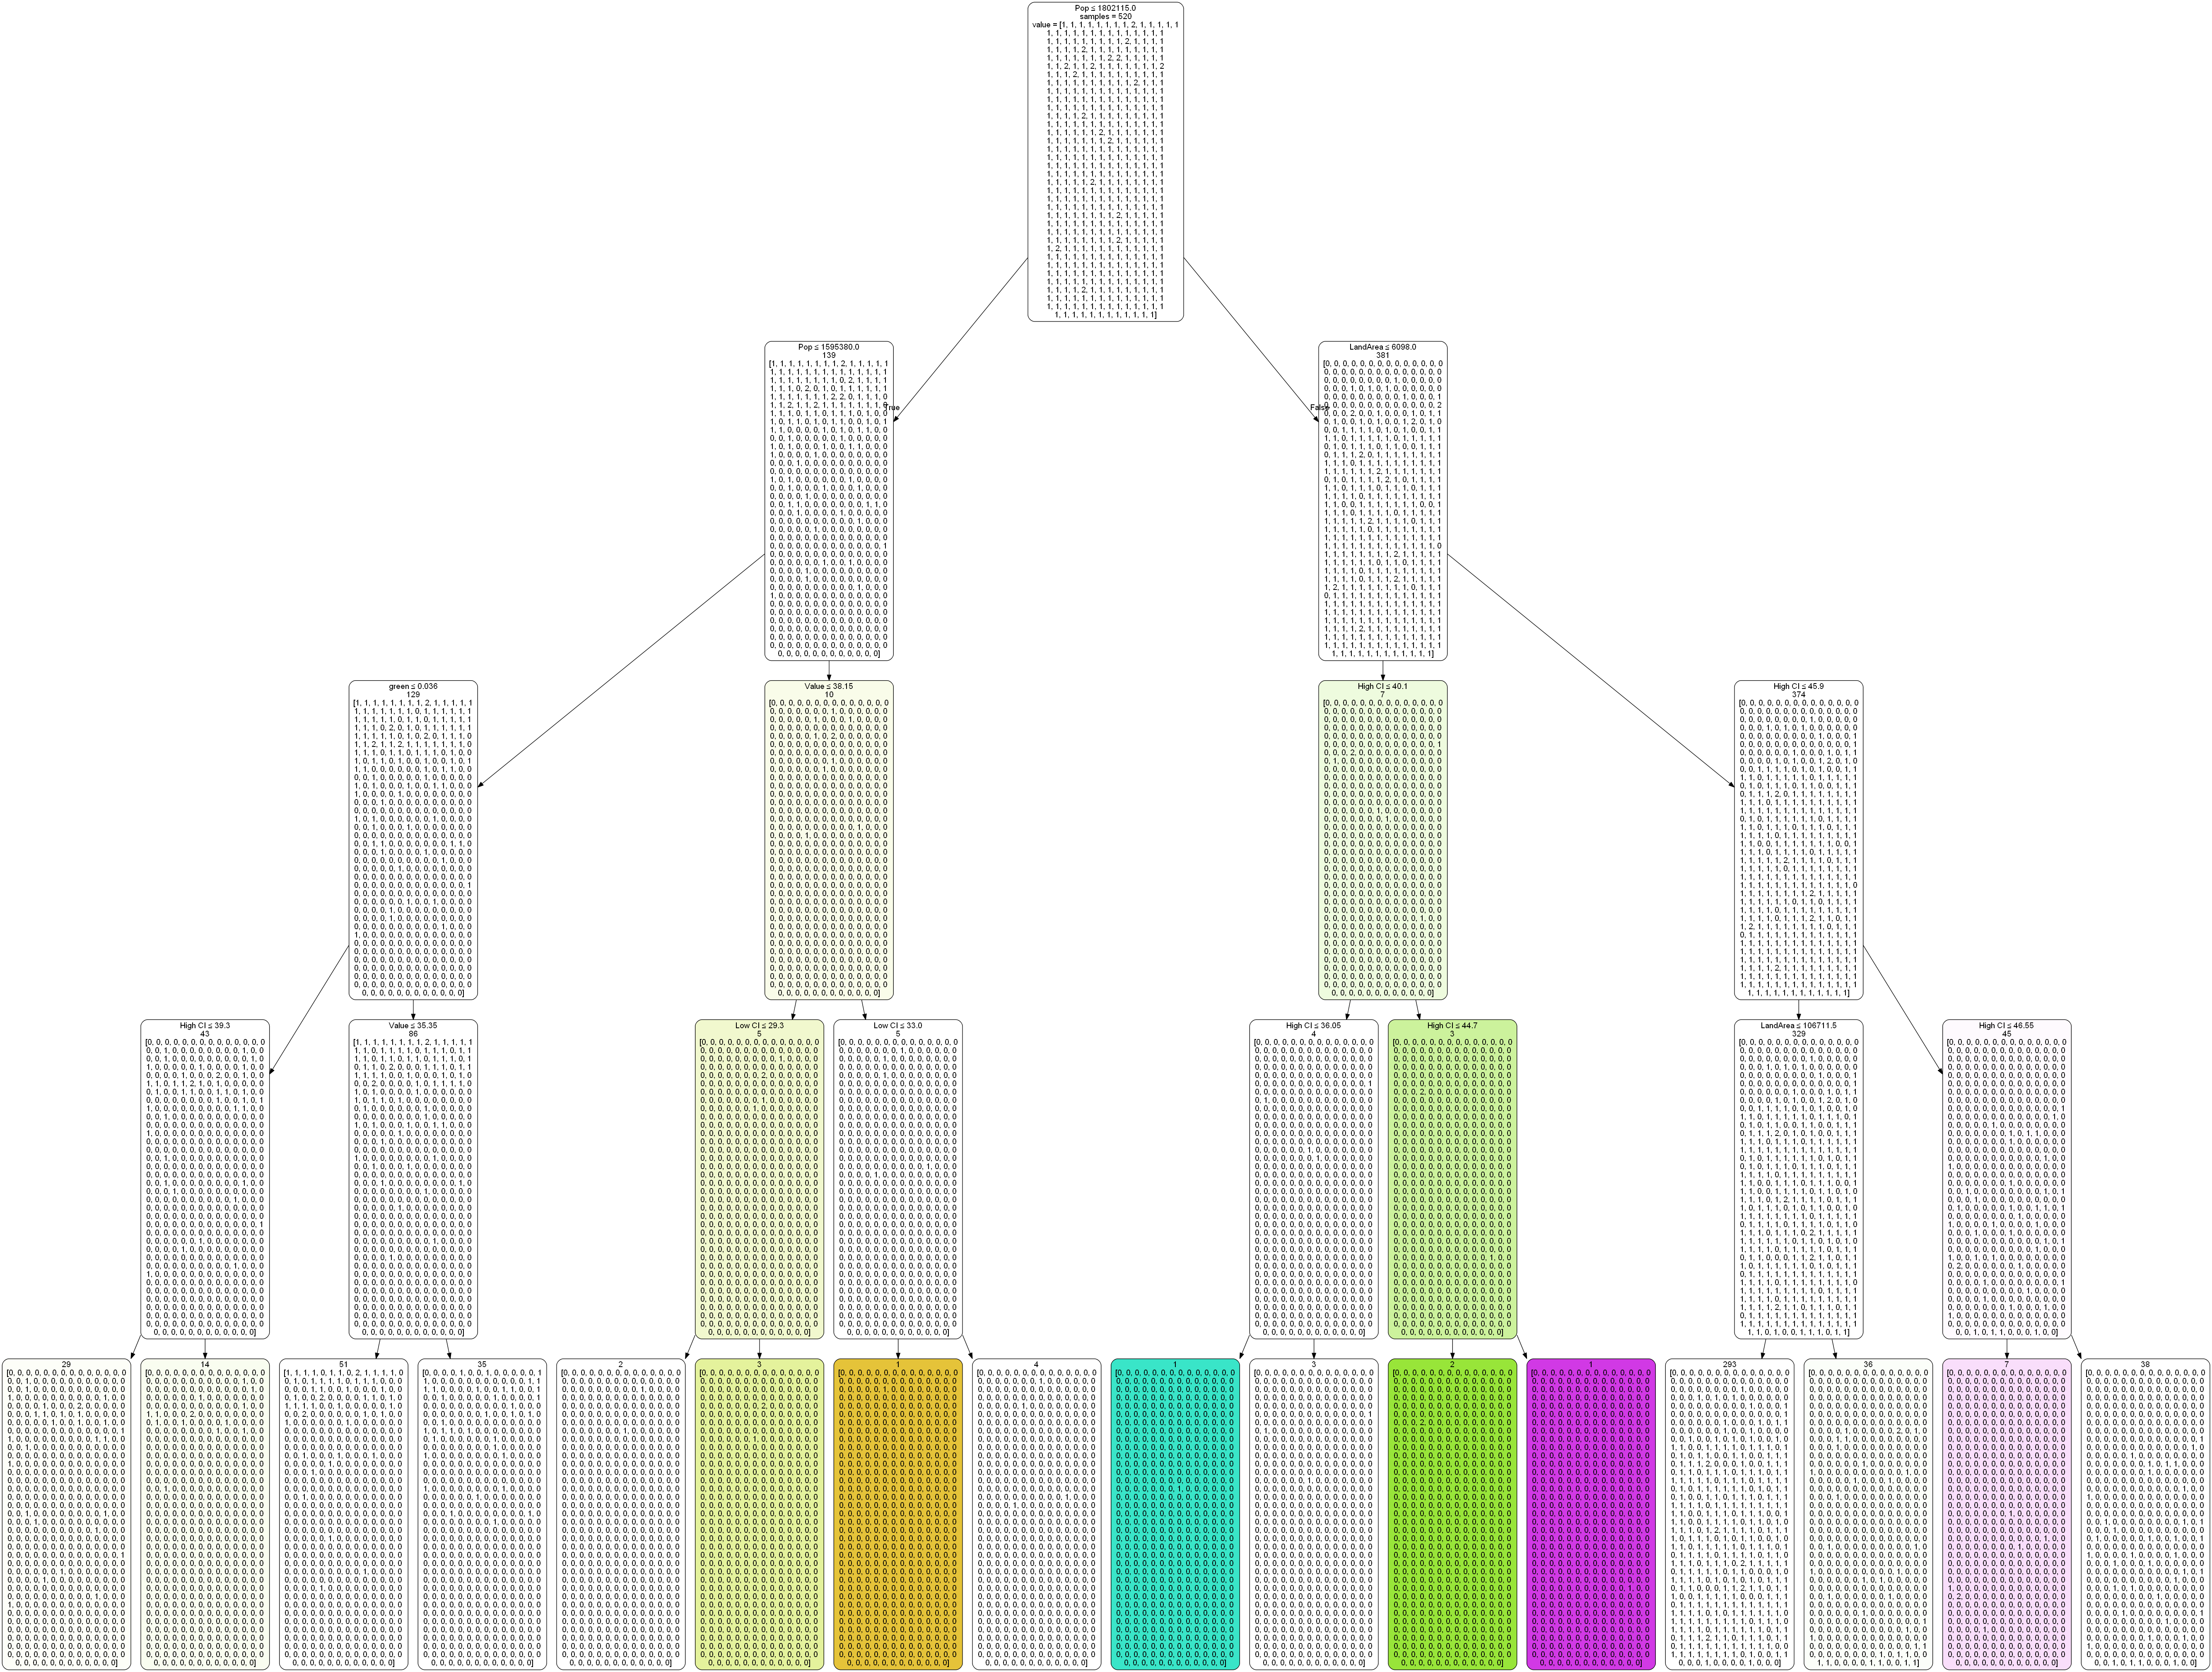

In [5]:
predictors = ['Value', 'Low CI', 'High CI', 'Density', 'Pop', 'LandArea', 'democrat', 'green', 'republican']
outcome = 'cases'
X = pd.get_dummies(df_join[predictors], drop_first=True)
y = df_join[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

DecisionTree = DecisionTreeClassifier(max_depth = 4)
DecisionTree.fit(train_X, train_y)

plotDecisionTree(DecisionTree, feature_names=train_X.columns)

In [6]:
df1_join = df_join.groupby("state")['cases'].sum()
print(df1_join)

df2_join = df_join.groupby('state', as_index=False).sum()
df2_join.head()


state
AK     10324
AL    125266
AR     75943
AZ    164897
CA    581870
CO     66127
CT     36751
DC     10384
DE     16255
FL    487146
GA    229781
HI      9286
IA     89548
ID     41075
IL    270935
IN    118065
KS     58175
KY     70672
LA    104269
MA     93413
MD     92528
ME      4152
MI    109846
MN    103411
MO    123264
MS     73779
MT     22555
NC    189218
ND     31086
NE     48965
NH      7182
NJ    107705
NM     30455
NV     61356
NY    195243
OH    137323
OK     84083
OR     28723
PA    125452
RI     19187
SC    120560
SD     32201
TN    166677
TX    602369
UT     81640
VA    121287
VT       950
WA     66646
WI    166651
WV     16240
WY      8666
Name: cases, dtype: int64


state   cases  deaths  Value  Low CI  High CI    Density        Pop  \
0    AK   10324      43  603.1   531.8    677.6    21.8671   12478034   
1    AL  125266    1861  606.4   528.1    688.5  1647.6757   83446540   
2    AR   75943    1392  650.4   569.3    734.8   992.8510   51663000   
3    AZ  164897    3487  651.8   583.5    722.0  1104.2333  125434330   
4    CA  581870   10737  669.9   619.8    720.9  4358.3376  678937500   

   LandArea  democrat     green  republican  
0   9700897  6.113440  1.711550    9.656578  
1    860965  6.458810  0.186501   10.267597  
2    884595  6.791775  0.247518    9.709110  
3   1931098  7.580199  0.505807    8.865601  
4   2648243  9.888311  0.649107    6.520149

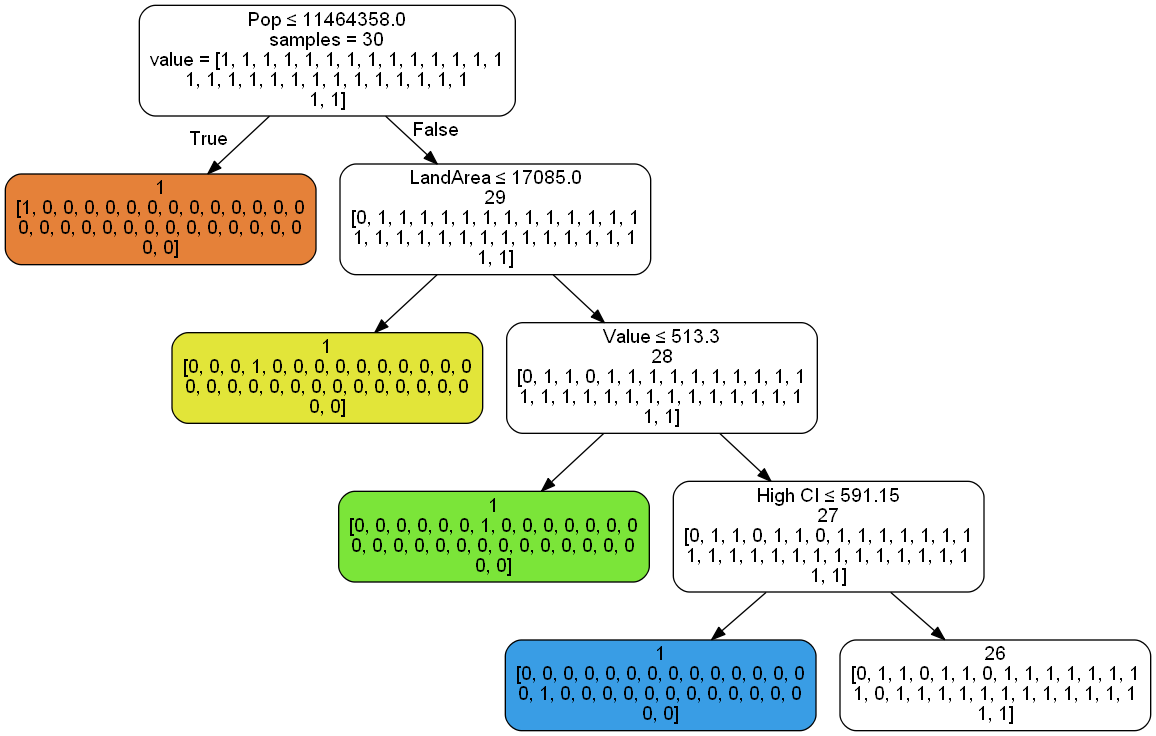

In [7]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

predictors = ['Value', 'Low CI', 'High CI', 'Density', 'Pop', 'LandArea', 'democrat', 'green', 'republican']
outcome = 'cases'
X = pd.get_dummies(df2_join[predictors], drop_first=True)
y = df2_join[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

DecisionTree = DecisionTreeClassifier(max_depth = 4)
DecisionTree.fit(train_X, train_y)

plotDecisionTree(DecisionTree, feature_names=train_X.columns)


In [8]:
import os
import math
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, recall_score, precision_score, f1_score
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import liftChart, gainsChart

In [9]:
#df_join = pd.read_csv("joineddataalldates.csv")
df2_join = pd.read_csv("Cleaned Election and Covid Data.csv", index_col=0, na_values=['(NA)']).fillna(0)
#df2_join = df_join.groupby('state', as_index=False).sum()
df2_join.head()
#df2_join['cases', 'deaths', 'Value', 'Low CI', 'High CI', 'Density', 'Pop', 'LandArea', 'democrat', 'green', 'republican'].astype(float)


State   Density       Pop  LandArea  Days to Max  Unnamed: 0.1 state_po  \
0    AK    1.2863    734002    570641          126             0       AK   
1    AL   96.9221   4908620     50645           79             3       AL   
2    AR   58.4030   3039000     52035           88             6       AR   
3    AZ   64.9549   7378490    113594           79             9       AZ   
4    CA  256.3728  39937500    155779           91            12       CA   

      party  candidatevotes  totalvotes  win_percentage  
0  democrat        124356.6    343794.2        0.359614  
1  democrat        745651.4   1969901.0        0.379930  
2  democrat        417722.4   1052291.2        0.399516  
3  democrat        959994.2   2153636.6        0.445894  
4  democrat       7496220.8  12826315.2        0.581665

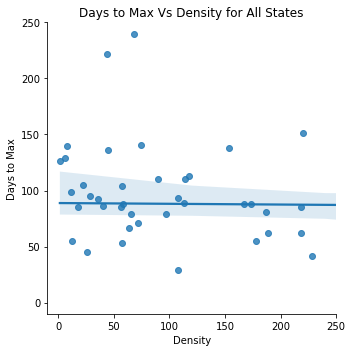

In [10]:
import numpy as np
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt

sns.lmplot(x="Density", y="Days to Max", data=df2_join)
plt.xlim(-10, 250)
plt.ylim(-10, 250)
plt.title('Days to Max Vs Density for All States')
plt.xlabel('Density')
plt.ylabel('Days to Max')
plt.tight_layout()
plt.show()

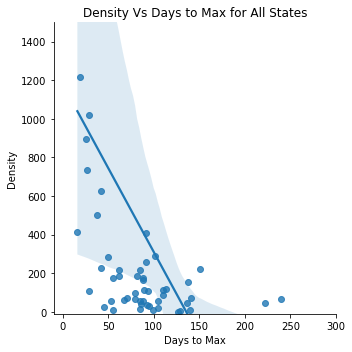

In [11]:
sns.lmplot(x="Days to Max", y="Density", data=df2_join)
plt.xlim(-10, 300)
plt.ylim(-10,1500)
plt.title('Density Vs Days to Max for All States')
plt.xlabel('Days to Max')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

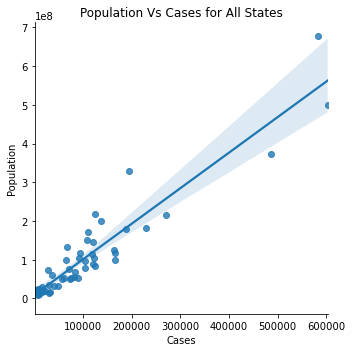

In [12]:
import numpy as np
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as plt

df_join = pd.read_csv("joineddataalldates.csv", index_col=0, na_values=['(NA)']).fillna(0)
df3_join = df_join.groupby('state', as_index=False).sum()
df3_join.head()

sns.lmplot(x="cases", y="Pop", data=df3_join)
#plt.xlim(-10000, 310000)
plt.title('Population Vs Cases for All States')
plt.xlabel('Cases')
plt.ylabel('Population')
plt.tight_layout()
plt.show()

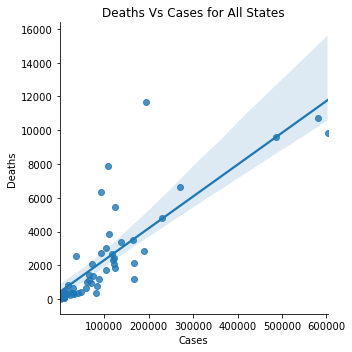

In [13]:
sns.lmplot(x="cases", y="deaths", data=df3_join)
plt.title('Deaths Vs Cases for All States')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.tight_layout()
plt.show()

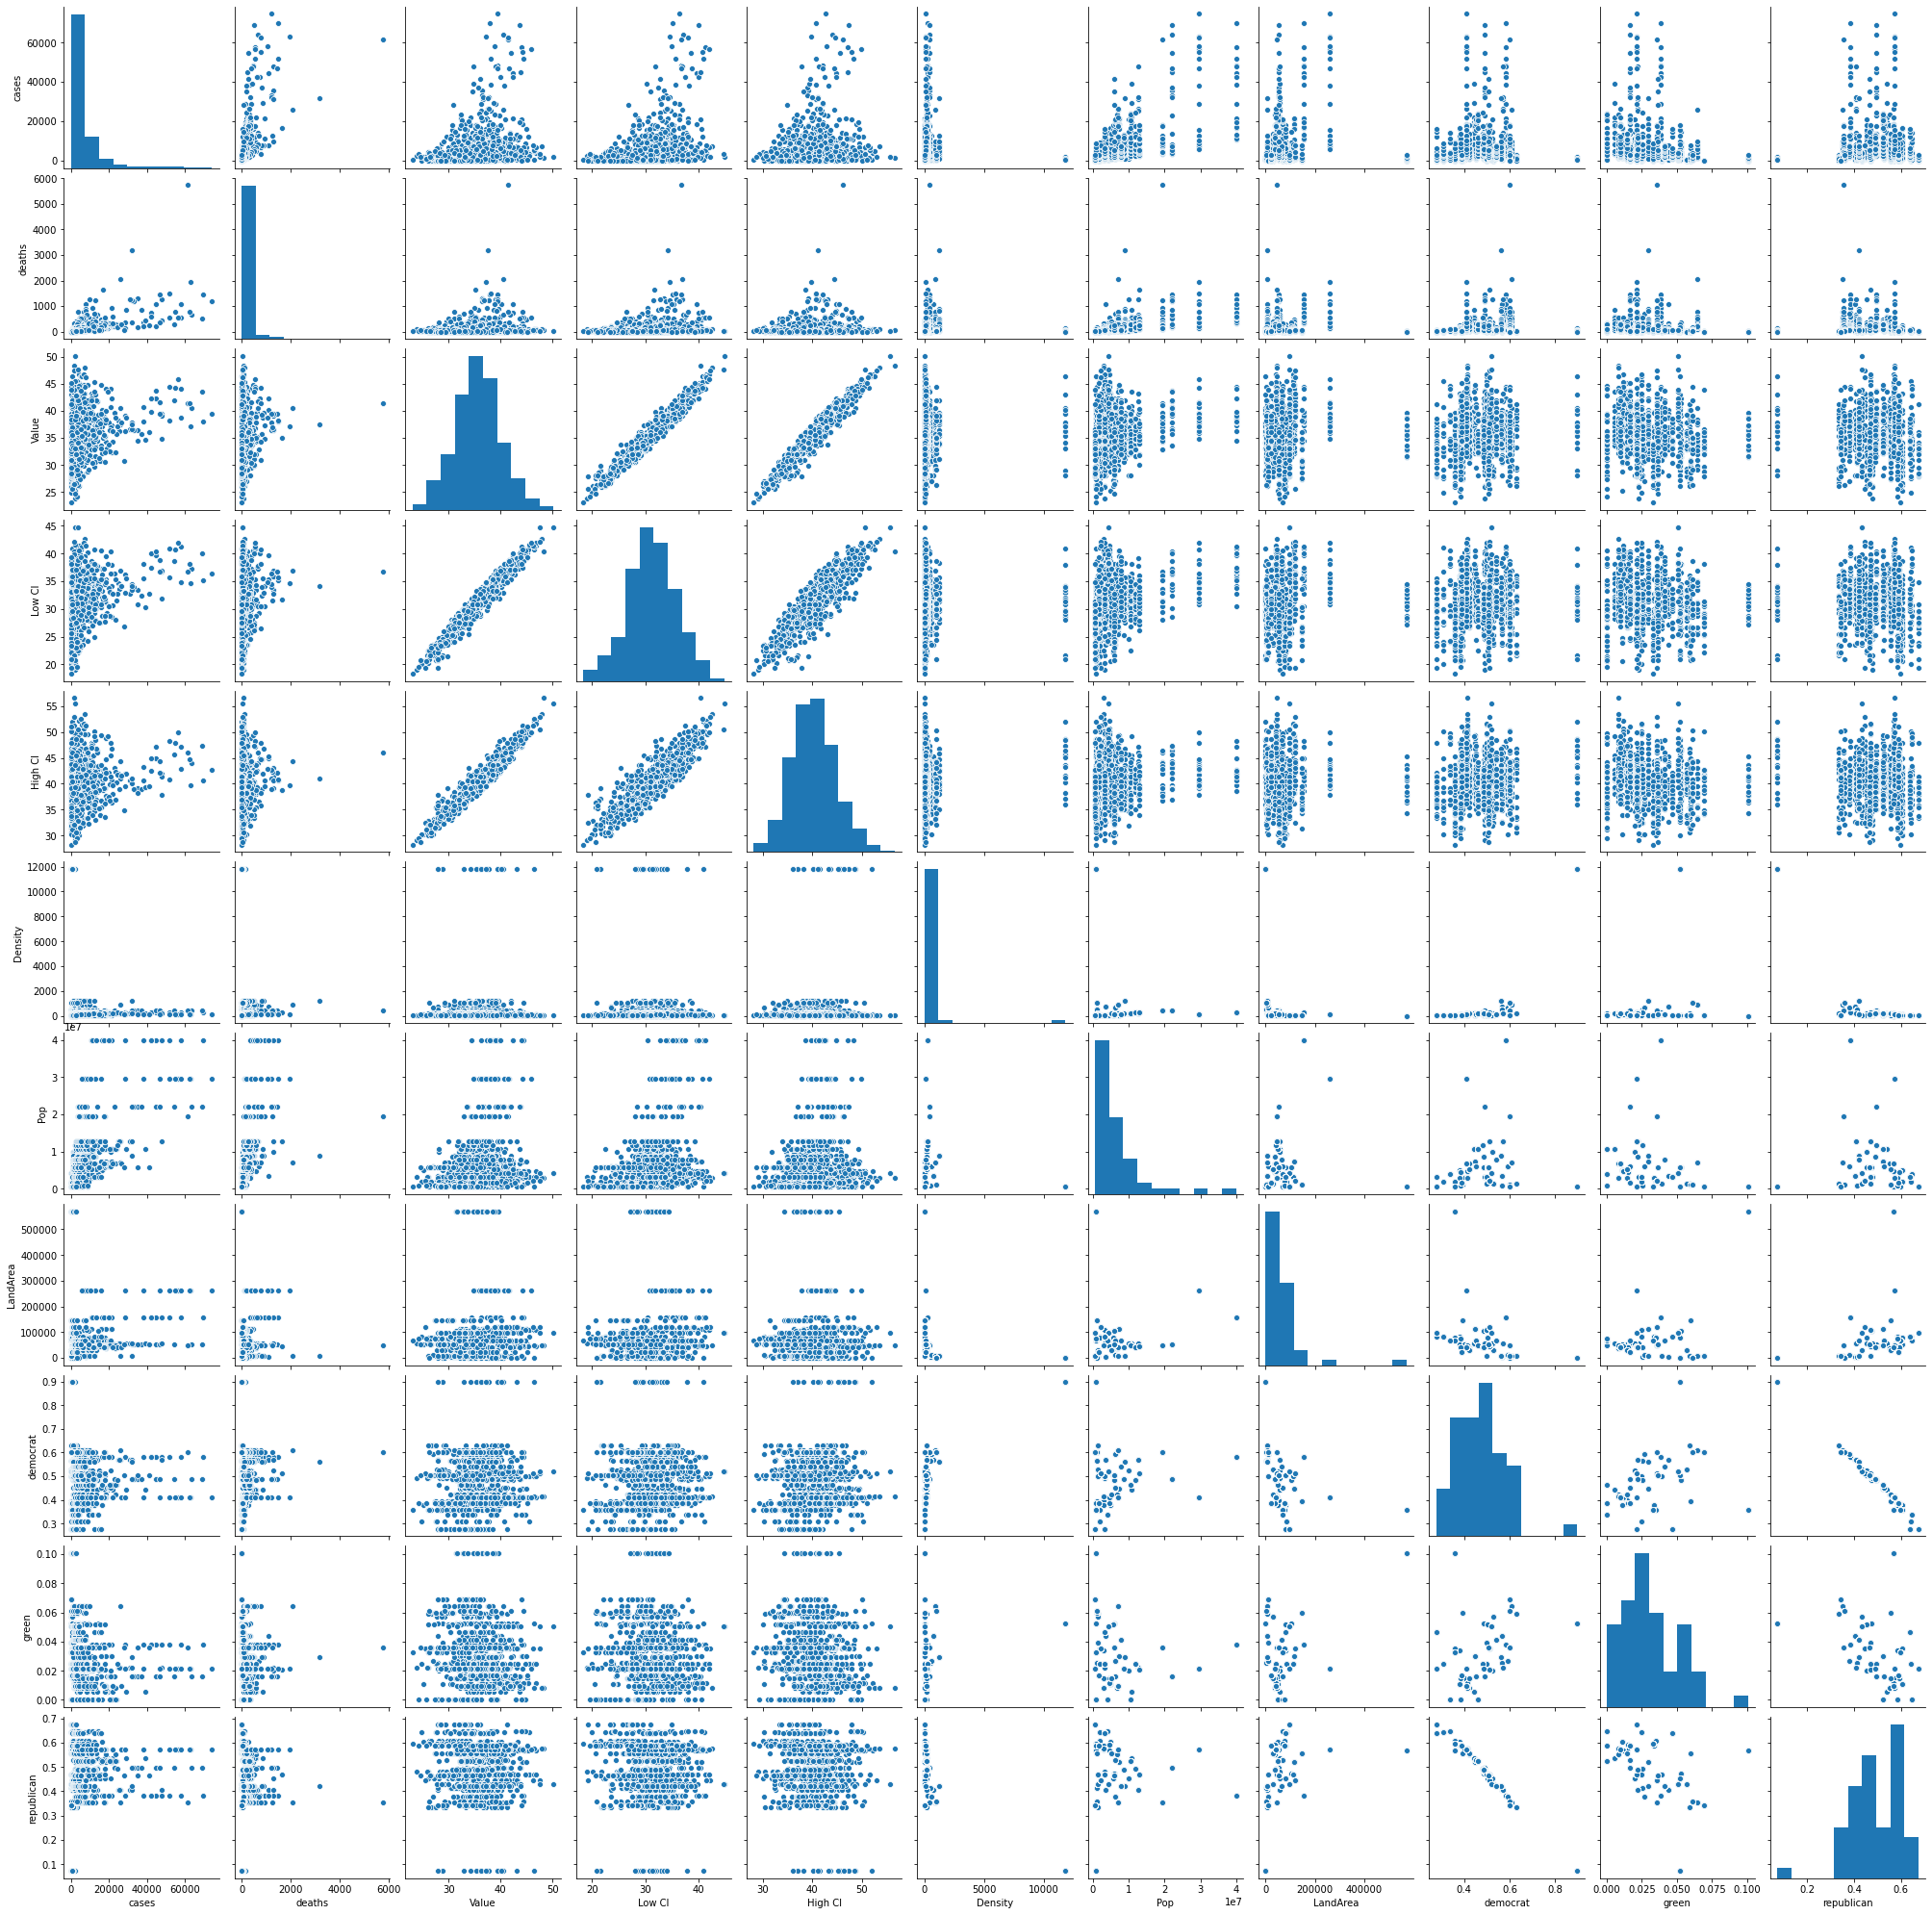

In [14]:
# Seaborn visualization library
import seaborn as sns# Create the default pairplot
sns.pairplot(df_join)
